Inspiration: http://iquantny.tumblr.com/post/142278062424/in-nyc-more-robberies-happen-right-when-school

Data set: https://data.cityofnewyork.us/Public-Safety/NYPD-7-Major-Felony-Incidents/hyij-8hr7

In [370]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time
%matplotlib inline

## Raw Data

In [314]:
url = 'https://data.cityofnewyork.us/api/views/hyij-8hr7/rows.csv?accessType=DOWNLOAD'

In [315]:
raw_data = pd.read_csv(url)

In [318]:
raw_data.head()

,OBJECTID,Identifier,Occurrence Date,Day of Week,Occurrence Month,Occurrence Day,Occurrence Year,Occurrence Hour,CompStat Month,CompStat Day,CompStat Year,Offense,Offense Classification,Sector,Precinct,Borough,Jurisdiction,XCoordinate,YCoordinate,Location 1
0,1,f070032d,09/06/1940 07:30:00 PM,Friday,Sep,6,1940,19,9,7,2010,BURGLARY,FELONY,D,66,BROOKLYN,N.Y. POLICE DEPT,987478,166141,"(40.6227027620001, -73.9883732929999)"
1,2,c6245d4d,12/14/1968 12:20:00 AM,Saturday,Dec,14,1968,0,12,14,2008,GRAND LARCENY,FELONY,G,28,MANHATTAN,N.Y. POLICE DEPT,996470,232106,"(40.8037530600001, -73.955861904)"
2,3,716dbc6f,10/30/1970 03:30:00 PM,Friday,Oct,30,1970,15,10,31,2008,BURGLARY,FELONY,H,84,BROOKLYN,N.Y. POLICE DEPT,986508,190249,"(40.688874254, -73.9918594329999)"
3,4,638cd7b7,07/18/1972 11:00:00 PM,Tuesday,Jul,18,1972,23,7,19,2012,GRAND LARCENY OF MOTOR VEHICLE,FELONY,F,73,BROOKLYN,N.Y. POLICE DEPT,1005876,182440,"(40.6674141890001, -73.9220463899999)"
4,5,6e410287,05/21/1987 12:01:00 AM,Thursday,May,21,1987,0,5,28,2009,GRAND LARCENY,FELONY,K,75,BROOKLYN,N.Y. POLICE DEPT,1017958,182266,"(40.6668988440001, -73.878495425)"


In [319]:
raw_data.dtypes

OBJECTID                  float64
Identifier                 object
Occurrence Date            object
Day of Week                object
Occurrence Month           object
Occurrence Day            float64
Occurrence Year           float64
Occurrence Hour           float64
CompStat Month            float64
CompStat Day              float64
CompStat Year             float64
Offense                    object
Offense Classification     object
Sector                     object
Precinct                  float64
Borough                    object
Jurisdiction               object
XCoordinate               float64
YCoordinate               float64
Location 1                 object
dtype: object

## Clean the data

Select years 2006 through 2015 into new dataframe.

In [353]:
df = raw_data[(raw_data['Occurrence Year'] >= 2006) & (raw_data['Occurrence Year'] <= 2015)].copy()

Convert columns in dataframe to the appropriate types.

In [355]:
# Convert floats to integers
df['OBJECTID'] = df['OBJECTID'].fillna(0).astype(int)
df['Occurrence Day'] = df['Occurrence Day'].fillna(0).astype(int)
df['Occurrence Year'] = df['Occurrence Year'].fillna(0).astype(int)
df['Occurrence Hour'] = df['Occurrence Hour'].fillna(0).astype(int)
df['CompStat Month'] = df['CompStat Month'].fillna(0).astype(int)
df['CompStat Day'] = df['CompStat Day'].fillna(0).astype(int)
df['CompStat Year'] = df['CompStat Year'].fillna(0).astype(int)
df['Precinct'] = df['Precinct'].fillna(0).astype(int)

# Convert categorical columns to categories
df['Offense'] = df['Offense'].astype('category')
df['Offense Classification'] = df['Offense Classification'].astype('category')
df['Sector'] = df['Sector'].astype('category')
df['Precinct'] = df['Precinct'].astype('category')
df['Borough'] = df['Borough'].astype('category')

# Convert Occurence Date column to datetime
df['Occurrence Date'] = pd.to_datetime(df['Occurrence Date'])

In [356]:
df.dtypes

OBJECTID                           int32
Identifier                        object
Occurrence Date           datetime64[ns]
Day of Week                       object
Occurrence Month                  object
Occurrence Day                     int32
Occurrence Year                    int32
Occurrence Hour                    int32
CompStat Month                     int32
CompStat Day                       int32
CompStat Year                      int32
Offense                         category
Offense Classification          category
Sector                          category
Precinct                        category
Borough                         category
Jurisdiction                      object
XCoordinate                      float64
YCoordinate                      float64
Location 1                        object
dtype: object

In [358]:
# Sort by Occurrence Date
df.sort('Occurrence Date', inplace=True)

In [359]:
# Reset index
df.reset_index(drop=True, inplace=True)

In [367]:
df.head()

,OBJECTID,Identifier,Occurrence Date,Day of Week,Occurrence Month,Occurrence Day,Occurrence Year,Occurrence Hour,CompStat Month,CompStat Day,CompStat Year,Offense,Offense Classification,Sector,Precinct,Borough,Jurisdiction,XCoordinate,YCoordinate,Location 1
0,13959,e99a726,1900-03-10 19:00:00,Saturday,Mar,10,2006,19,3,20,2006,BURGLARY,FELONY,K,66,BROOKLYN,N.Y. POLICE DEPT,991680,174677,"(40.646129746, -73.973227133)"
1,17531,46381a23,1900-08-07 08:30:00,Tuesday,Aug,7,2006,8,8,7,2006,BURGLARY,FELONY,H,61,BROOKLYN,N.Y. POLICE DEPT,1000205,159291,"(40.6038871490001, -73.9425433179999)"
2,14969,3eace9c6,2006-01-01 00:00:00,Sunday,Jan,1,2006,0,3,14,2006,GRAND LARCENY,FELONY,N,19,MANHATTAN,N.Y. POLICE DEPT,995476,216536,"(40.76101886, -73.9594783209999)"
3,14972,497a68e5,2006-01-01 00:00:00,Sunday,Jan,1,2006,0,2,1,2006,GRAND LARCENY,FELONY,K,45,BRONX,N.Y. POLICE DEPT,1027418,246508,"(40.8431854130001, -73.84398293)"
4,14971,684b5944,2006-01-01 00:00:00,Sunday,Jan,1,2006,0,8,2,2007,GRAND LARCENY,FELONY,F,43,BRONX,N.Y. POLICE DEPT,1022591,240676,"(40.8272005520001, -73.861462059)"


## What times of day do major felonies happen?

In [169]:
# The groupby method can be used to slice and dice data frames
g = df.groupby(df['Offense'])

In [174]:
g.describe()

CompStat Day  CompStat Month  \
Offense                                                               
BURGLARY                       count  191045.000000   191045.000000   
                               mean       15.863723        6.732283   
                               std         8.800714        3.433935   
                               min         1.000000        1.000000   
                               25%         8.000000        4.000000   
                               50%        16.000000        7.000000   
                               75%        23.000000       10.000000   
                               max        31.000000       12.000000   
FELONY ASSAULT                 count  183879.000000   183879.000000   
                               mean       15.709673        6.619696   
                               std         8.862548        3.296956   
                               min         1.000000        1.000000   
                               25%         8.000000        4.000000   
                               50%        16.000000        7.000000   
                               75%        23.000000        9.000000   
                               max        31.000000       12.000000   
GRAND LARCENY                  count  424635.000000   424635.000000   
                               mean       15.758955        6.754274   
                               std         8.759363        3.408620   
                               min         1.000000        1.000000   
                               25%         8.000000        4.000000   
                               50%        16.000000        7.000000   
                               75%        23.000000       10.000000   
                               max        31.000000       12.000000   
GRAND LARCENY OF MOTOR VEHICLE count  101728.000000   101728.000000   
                               mean       15.868758        6.709244   
                               std         8.776883        3.378726   
                               min         1.000000        1.000000   
                               25%         8.000000        4.000000   
                               50%        16.000000        7.000000   
                               75%        23.000000       10.000000   
                               max        31.000000       12.000000   
MURDER & NON-NEGL. MANSLAUGHTE count    4443.000000     4443.000000   
                               mean       15.824893        6.697277   
                               std         8.929432        3.320215   
                               min         1.000000        1.000000   
                               25%         8.000000        4.000000   
                               50%        16.000000        7.000000   
                               75%        24.000000        9.000000   
                               max        31.000000       12.000000   
RAPE                           count   12974.000000    12974.000000   
                               mean       15.530985        6.580931   
                               std         8.842302        3.381867   
                               min         1.000000        1.000000   
                               25%         8.000000        4.000000   
                               50%        15.000000        7.000000   
                               75%        23.000000        9.000000   
                               max        31.000000       12.000000   
ROBBERY                        count  198569.000000   198569.000000   
                               mean       15.891670        6.779402   
                               std         8.804378        3.440681   
                               min         1.000000        1.000000   
                               25%         8.000000        4.000000   
                               50%        16.000000        7.000000   
                               75%        23.000000       10.00

In [362]:
# Calculate total row counts grouped by Offense type
df['Occurrence Date'].groupby(df['Offense']).count()

Offense
BURGLARY                          191045
FELONY ASSAULT                    183879
GRAND LARCENY                     424635
GRAND LARCENY OF MOTOR VEHICLE    101728
MURDER & NON-NEGL. MANSLAUGHTE      4443
RAPE                               12974
ROBBERY                           198569
Name: Occurrence Date, dtype: int64

In [363]:
# Calulate row counts grouped by Occurrence Hour and Offense
offense_by_hour = df['Occurrence Date'].groupby([df['Occurrence Hour'], df['Offense']]).count().unstack()
offense_by_hour.head()

Offense,BURGLARY,FELONY ASSAULT,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,MURDER & NON-NEGL. MANSLAUGHTE,RAPE,ROBBERY
Occurrence Hour,,,,,,,
0,5575,10161,23173,4456,281,1641,10065
1,4629,9565,10686,3762,258,650,9833
2,4405,9065,8980,2744,257,721,8740
3,4021,8794,7598,2030,246,665,8199
4,3995,8289,5568,1743,266,612,8014


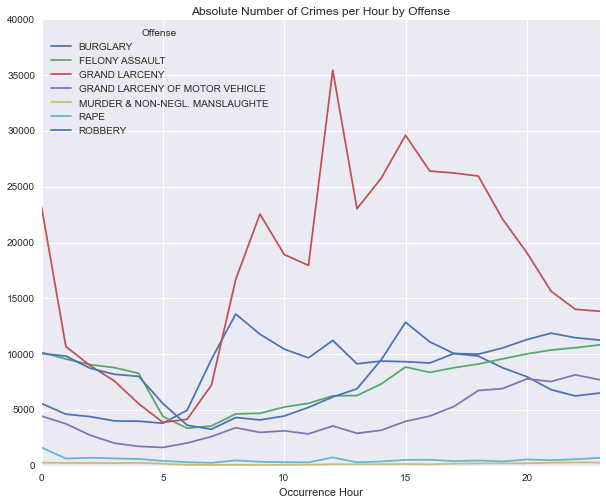

In [364]:
# Plot row counts grouped by Occurrence Hour and Offense
offense_by_hour.plot(figsize=(10,8), title='Absolute Number of Crimes per Hour by Offense')

Nice! We're getting somewhere. The chart above shows the total absolute count of incidents by offense type. We're looking for the hourly crime rate, though. So, we need to divide the absolute incident counts by the number of days in our period.

In [365]:
# Calculate days in 2006-2015
first_day = df['Occurrence Date'][2]
last_day = df['Occurrence Date'].max()
delta = last_day - first_day
days = delta.days-1
print "# of days in time period:", days

# of days in time period: 3650


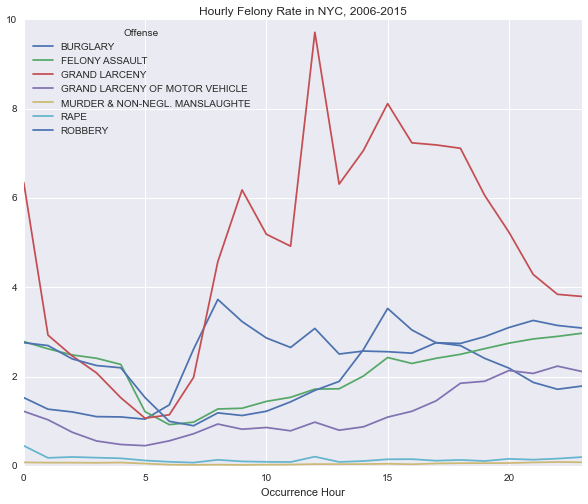

In [366]:
# Convert absoulute number of crimes per hour into hourly crime rate by dividing by number of days
crime_rate_hourly_by_offense = offense_by_hour.div(days)
crime_rate_hourly_by_offense.plot(figsize=(10,8), title='Hourly Felony Rate in NYC, 2006-2015');

Is school getting out responsible for more crimes? Let's look into further by comparing crime rates on school days versus non-school days.

## Do crime rates increase when school gets out?

I want to categorize every day as either 1. School Day, 2. Weekday Holiday, 3. Weekend or 4. Summer Vacation.

In order to do so I'll need to insert a Date column into the dataframe that is simply a date (rather than a datetime stamp)

In [391]:
# Set datetime to simply date value (we may need this later)
df['Date'] = df['Occurrence Date'].dt.date

In [489]:
# Create Month-Day column to store a (Month, Day) tuple in order to compare month-days
df['Month-Day'] = zip([date.date().month for date in df['Occurrence Date']],df['Occurrence Day'])

In [491]:
# I made a CSV of school year holidays in 2015-2016 per http://schools.nyc.gov/Calendar/default.htm
holidays = pd.read_csv('C:/Users/Will/Desktop/2015_holidays.csv')
holidays['Date'] = pd.to_datetime(holidays['Date'])
holidays['Month'] = [date.date().month for date in holidays['Date']]
holidays['Day'] = [date.date().day for date in holidays['Date']]
holidays['Month-Day'] = zip(holidays.Month, holidays.Day)
holidays.head()

,Date,Holiday,Month,Day,Month-Day
0,2015-09-14,Rosh Hashanah,9,14,"(9, 14)"
1,2015-09-15,Rosh Hashanah,9,15,"(9, 15)"
2,2015-09-23,Yom Kippur,9,23,"(9, 23)"
3,2015-09-24,Eid al-Adha,9,24,"(9, 24)"
4,2015-10-12,Columbus Day,10,12,"(10, 12)"


In [511]:
# Set summer vacation = 1 where month is July, August or September (and before Sept 9)
df['Summer Vacation'] = np.where((df['Occurrence Month'] == 'Jul') | (df['Occurrence Month'] =='Aug')
                                 | ((df['Occurrence Month'] == 'Sep') & (df['Occurrence Day'] < 9)),1,0)

# Set weekend day = 1 where day is Saturday or Sunday
df['Weekend Day'] = np.where(((df['Day of Week'] == 'Saturday') | (df['Day of Week'] == 'Sunday')),1,0)

# Set weekday holiday = 1 if the month-day was a holiday in 2015. This assumes month-day holidays will be same in other years
df['Weekday Holiday'] = [1 if monthday in list(holidays['Month-Day']) else 0 for monthday in df['Month-Day']]

# Set school day = 1 if none of the previous three new columns are = 1
df['School Day'] = np.where((df['Summer Vacation'] != 1) & (df['Weekend Day'] != 1) & (df['Weekday Holiday'] !=1),1,0)

In [520]:
# Set Day Type equal to which ever of the previous for new columns has a 1
def day_type(row):
    if row['Summer Vacation'] == 1:
        return 'Summer Vacation'
    if row['Weekend Day'] == 1:
        return 'Weekend Day'
    if row['Weekday Holiday'] == 1:
        return 'Weekday Holiday'
    if row['School Day'] == 1:
        return 'School Day'

df['Day Type'] = df.apply(lambda row: day_type(row), axis=1)

In [529]:
# Convert Day Type column to categorical
df['Day Type'] = df['Day Type'].astype('category')

In [756]:
# Don't need this anymore - but keeping this to refer back to later
first_day = datetime.date(pd.to_datetime('9/9/2015')) # First day of school in 2015-2016 year
last_day = datetime.date(pd.to_datetime('6/28/2016')) # Last day of school in 2015-2016 year

In [530]:
df.dtypes

OBJECTID                           int32
Identifier                        object
Occurrence Date           datetime64[ns]
Day of Week                       object
Occurrence Month                  object
Occurrence Day                     int32
Occurrence Year                    int32
Occurrence Hour                    int32
CompStat Month                     int32
CompStat Day                       int32
CompStat Year                      int32
Offense                         category
Offense Classification          category
Sector                          category
Precinct                        category
Borough                         category
Jurisdiction                      object
XCoordinate                      float64
YCoordinate                      float64
Location 1                        object
Date                              object
Summer Vacation                    int32
Weekend Day                        int32
Month-Day                         object
Weekday Holiday 

In [710]:
len(np.unique(df[df['Day Type'] == 'School Day']['Month-Day']))

258

In [535]:
crimes_by_day_type = df['Occurrence Date'].groupby([df['Occurrence Hour'], df['Day Type']]).count().unstack()
crime_rate_hourly_by_day_type = crimes_by_day_type.div(days)

crime_rate_hourly_by_day_type.head()

Day Type,School Day,Summer Vacation,Weekday Holiday,Weekend Day
Occurrence Hour,,,,
0,6.735616,3.466301,1.072877,3.890137
1,4.010685,2.609589,0.659178,3.510411
2,3.286027,2.338904,0.598630,3.341370
3,2.790685,2.060274,0.506301,3.287397
4,2.482740,1.913151,0.450137,2.958630


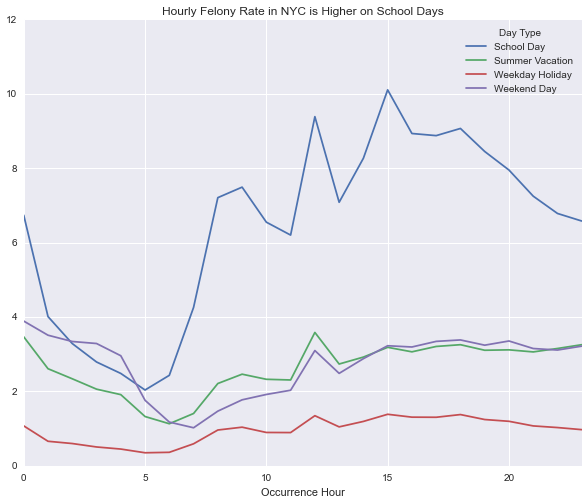

In [541]:
crime_rate_hourly_by_day_type.plot(figsize=(10,8), title='Hourly Felony Rate in NYC is Higher on School Days');

## Robberies

Let's look into robberies, specifically.

In [573]:
robbery = df[df['Offense'] == 'ROBBERY']

robbery_by_day_type = robbery['Occurrence Date'].groupby([robbery['Occurrence Hour'], robbery['Day Type']]).count().unstack()
robbery_rate_hourly_by_day_type = robbery_by_day_type.div(days)

robbery_rate_hourly_by_day_type.head()

Day Type,School Day,Summer Vacation,Weekday Holiday,Weekend Day
Occurrence Hour,,,,
0,1.169863,0.674521,0.192055,0.721096
1,1.047945,0.710685,0.162192,0.773151
2,0.876986,0.628219,0.154247,0.735068
3,0.752603,0.603014,0.131233,0.759452
4,0.687671,0.595342,0.123562,0.789041


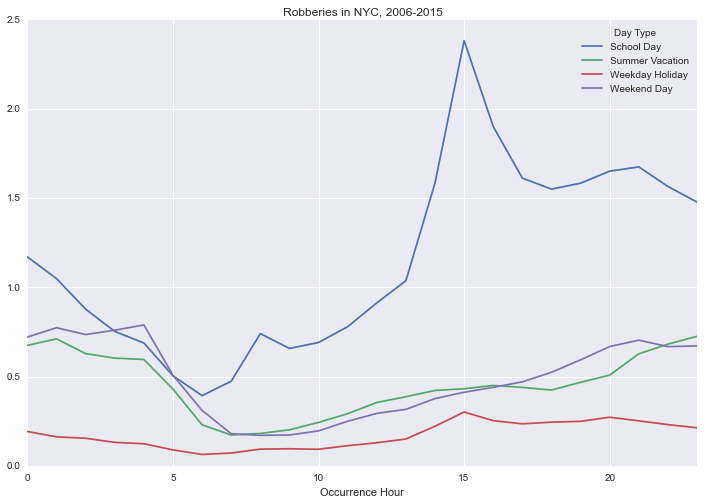

In [765]:
robbery_rate_hourly_by_day_type.plot(figsize=(12,8), title='Robberies in NYC, 2006-2015');

Robberies see a spike when school gets out.

## Burglaries

Now let's look into burglaries.

In [555]:
burglary = df[df['Offense'] == 'BURGLARY']

burglary_by_day_type = burglary['Occurrence Date'].groupby([burglary['Occurrence Hour'], burglary['Day Type']]).count().unstack()
burglary_rate_hourly_by_day_type = burglary_by_day_type.div(days)

burglary_rate_hourly_by_day_type.head()

Day Type,School Day,Summer Vacation,Weekday Holiday,Weekend Day
Occurrence Hour,,,,
0,0.690137,0.365753,0.106849,0.364658
1,0.571233,0.300822,0.078082,0.318082
2,0.561370,0.292329,0.081644,0.271507
3,0.498630,0.270137,0.081644,0.251233
4,0.491233,0.254795,0.075616,0.272877


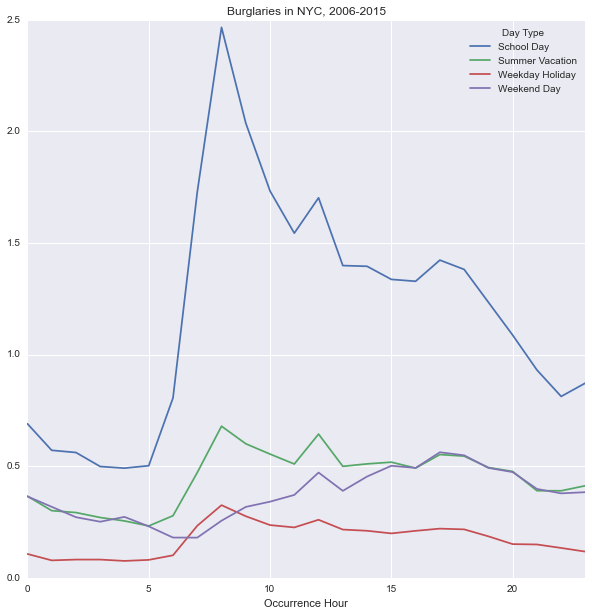

In [578]:
burglary_rate_hourly_by_day_type.plot(figsize=(10,10), title='Burglaries in NYC, 2006-2015');

Burglaries, on the other hand, see a morning spike on school days.

## Felony Assault

In [581]:
felonyassault = df[df['Offense'] == 'FELONY ASSAULT']

felonyassault_by_day_type = felonyassault['Occurrence Date'].groupby([felonyassault['Occurrence Hour'], felonyassault['Day Type']]).count().unstack()
felonyassault_rate_hourly_by_day_type = felonyassault_by_day_type.div(days)

felonyassault_rate_hourly_by_day_type.head()

Day Type,School Day,Summer Vacation,Weekday Holiday,Weekend Day
Occurrence Hour,,,,
0,1.014247,0.704384,0.155616,0.909589
1,0.830959,0.672329,0.144110,0.973151
2,0.668219,0.595068,0.148219,1.072055
3,0.611233,0.536712,0.129315,1.132055
4,0.554247,0.522466,0.124110,1.070137


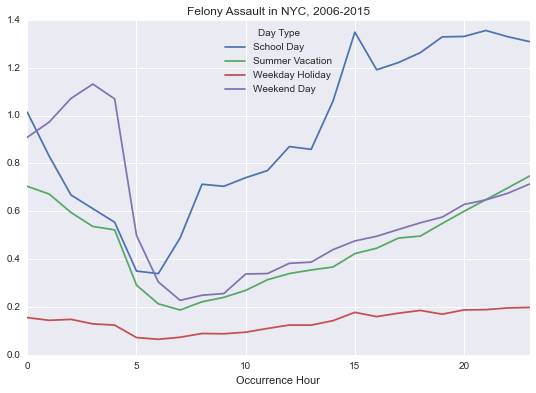

In [584]:
felonyassault_rate_hourly_by_day_type.plot(figsize=(9,6), title='Felony Assault in NYC, 2006-2015');

Felony assault jumps up latenight on weekend nights and then back up again on school days.

## Grand Larceny

In [585]:
grandlarceny = df[df['Offense'] == 'GRAND LARCENY']

grandlarceny_by_day_type = grandlarceny['Occurrence Date'].groupby([grandlarceny['Occurrence Hour'], grandlarceny['Day Type']]).count().unstack()
grandlarceny_rate_hourly_by_day_type = grandlarceny_by_day_type.div(days)

grandlarceny_rate_hourly_by_day_type.head()

Day Type,School Day,Summer Vacation,Weekday Holiday,Weekend Day
Occurrence Hour,,,,
0,3.109041,1.311781,0.483836,1.444110
1,1.055616,0.615068,0.192055,1.064932
2,0.794795,0.564384,0.152329,0.948767
3,0.643836,0.453151,0.115068,0.869589
4,0.497534,0.367945,0.086849,0.573151


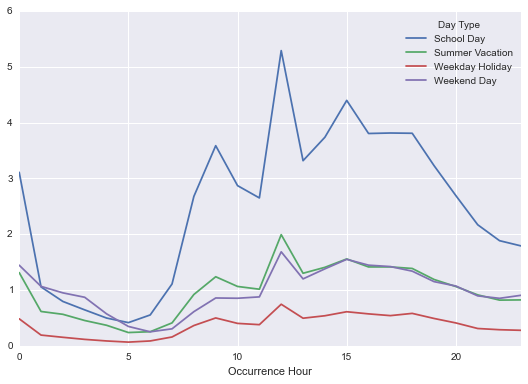

In [586]:
grandlarceny_rate_hourly_by_day_type.plot(figsize=(9,6));

Spikes across all crimes when kids leave school.

## Grand Larceny of Motor Vehicles

In [590]:
grandlarcenymv = df[df['Offense'] == 'GRAND LARCENY OF MOTOR VEHICLE']

grandlarcenymv_by_day_type = grandlarcenymv['Occurrence Date'].groupby([grandlarcenymv['Occurrence Hour'],
                                                                        grandlarcenymv['Day Type']]).count().unstack()
grandlarcenymv_rate_hourly_by_day_type = grandlarcenymv_by_day_type.div(days)

grandlarcenymv_rate_hourly_by_day_type.head()

Day Type,School Day,Summer Vacation,Weekday Holiday,Weekend Day
Occurrence Hour,,,,
0,0.537260,0.292877,0.078904,0.311781
1,0.420000,0.247123,0.064658,0.298904
2,0.294521,0.187123,0.044932,0.225205
3,0.204110,0.136986,0.036986,0.178082
4,0.181370,0.114795,0.029863,0.151507


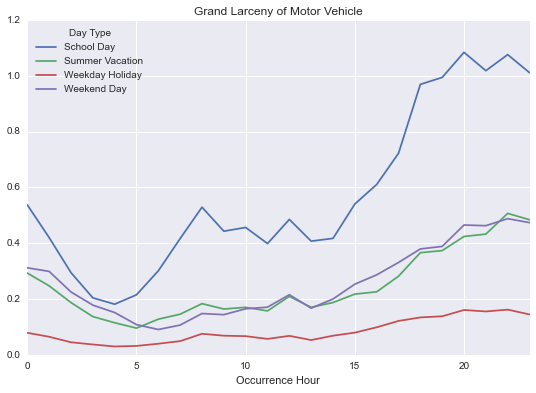

In [592]:
grandlarcenymv_rate_hourly_by_day_type.plot(figsize=(9,6), title='Grand Larceny of Motor Vehicle');

Murder and rape have too few instance for this kind of comparison, so skip them.

## Was more crime committed on school days overall, or at different times?

In [743]:
df[df['Day Type'] == 'School Day'].count()

OBJECTID                  562883
Identifier                562883
Occurrence Date           562883
Day of Week               562883
Occurrence Month          562883
Occurrence Day            562883
Occurrence Year           562883
Occurrence Hour           562883
CompStat Month            562883
CompStat Day              562883
CompStat Year             562883
Offense                   562883
Offense Classification    562883
Sector                    550494
Precinct                  562883
Borough                   562833
Jurisdiction              562883
XCoordinate               562883
YCoordinate               562883
Location 1                562883
Date                      562883
Summer Vacation           562883
Weekend Day               562883
Month-Day                 562883
Weekday Holiday           562883
School Day                562883
Day Type                  562883
dtype: int64

In [759]:
summer_days = len(np.unique(df[df['Day Type'] == 'Summer Vacation']['Month-Day']))
summer_days = summer_days * (2015-2006)

630

In [734]:
len(np.unique(df[df['Day Type'] == 'Weekday Holiday']['Month-Day']))

38

In [762]:
# Define the aggregation calculations

aggregations = {
    'OBJECTID': { # work on the "OBJECT ID" column
        'num_occurrences': 'count',  # get the count, and call this result 'num_occurences'
        'hourly_rate': lambda x: x.count()# / summer_days}, # convert
    }
 
# Perform groupby aggregation by "month", but only on the rows that are of type "call"
g = df.groupby([df['Offense'].astype('str'), df['Occurrence Hour'], df['Day Type']]).agg(aggregations).unstack()
g

OBJECTID                  \
                               num_occurrences                   
Day Type                            School Day Summer Vacation   
Offense        Occurrence Hour                                   
BURGLARY       0                          2519            1335   
               1                          2085            1098   
               2                          2049            1067   
               3                          1820             986   
               4                          1793             930   
               5                          1833             848   
               6                          2941            1015   
               7                          6308            1721   
               8                          9001            2479   
               9                          7436            2192   
               10                         6325            2023   
               11                         5636            1861   
               12                         6214            2350   
               13                         5106            1823   
               14                         5094            1863   
               15                         4880            1891   
               16                         4849            1794   
               17                         5195            2015   
               18                         5043            1990   
               19                         4506            1804   
               20                         3969            1739   
               21                         3399            1424   
               22                         2966            1423   
               23                         3185            1506   
FELONY ASSAULT 0                          3702            2571   
               1                          3033            2454   
               2                          2439            2172   
               3                          2231            1959   
               4                          2023            1907   
               5                          1278            1064   
...                                        ...             ...   
RAPE           18                          238              99   
               19                          179              76   
               20                          273             122   
               21                          238             118   
               22                          292             126   
               23                          307             154   
ROBBERY        0                          4270            2462   
               1                          3825            2594   
               2                          3201            2293   
               3                          2747            2201   
               4                          2510            2173   
               5                          1839            1568   
               6                          1435             837   
               7                          1729             629   
               8                          2702             661   
               9                          2399             736   
               10                         2520             887   
               11                         2844            1065   
               12                         3330            1294   
               13                         3784            1412   
               14                         5781            1540   
               15                         8690            1575   
               16                         6935            1642   
               17                         5882            1603   
               18                         5655            1548   
               19                         5777            1707   
            

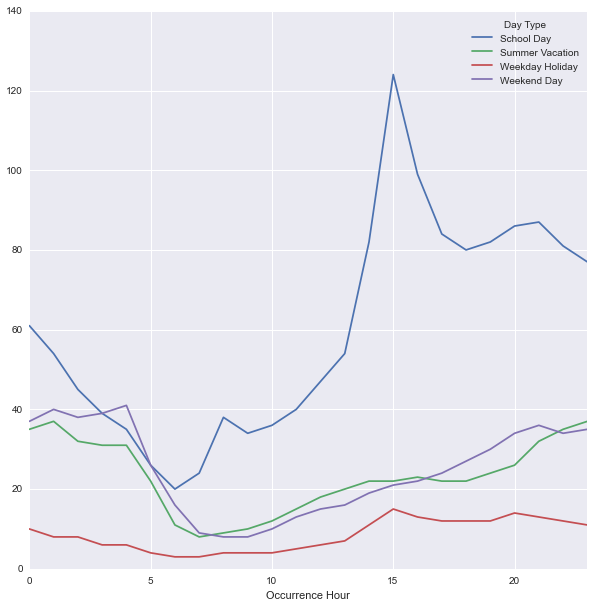

In [761]:
g.loc['ROBBERY',('OBJECTID', 'hourly_rate')].plot(figsize=(10,10))

In [753]:
g[('OBJECTID', 'hourly_rate')]

Day Type                        School Day  Summer Vacation  Weekday Holiday  \
Offense        Occurrence Hour                                                 
BURGLARY       0                      2519             1335              390   
               1                      2085             1098              285   
               2                      2049             1067              298   
               3                      1820              986              298   
               4                      1793              930              276   
               5                      1833              848              293   
               6                      2941             1015              368   
               7                      6308             1721              851   
               8                      9001             2479             1188   
               9                      7436             2192             1007   
               10                     6325             2023              862   
               11                     5636             1861              824   
               12                     6214             2350              949   
               13                     5106             1823              789   
               14                     5094             1863              769   
               15                     4880             1891              726   
               16                     4849             1794              768   
               17                     5195             2015              804   
               18                     5043             1990              792   
               19                     4506             1804              678   
               20                     3969             1739              551   
               21                     3399             1424              545   
               22                     2966             1423              488   
               23                     3185             1506              428   
FELONY ASSAULT 0                      3702             2571              568   
               1                      3033             2454              526   
               2                      2439             2172              541   
               3                      2231             1959              472   
               4                      2023             1907              453   
               5                      1278             1064              263   
...                                    ...              ...              ...   
RAPE           18                      238               99               36   
               19                      179               76               28   
               20                      273              122               35   
               21                      238              118               38   
               22                      292              126               40   
               23                      307              154               62   
ROBBERY        0                      4270             2462              701   
               1                      3825             2594              592   
               2                      3201             2293              563   
               3                      2747             2201              479   
               4                      2510             2173              451   
               5                      1839             1568              325   
               6                      1435              837              232   
               7                      1729              629              261   
               8                      2702              661              341   
               9                      2399              736              348   
               10                     2520              887              338   


In [758]:
school_days_in_2015 = len(np.unique(df['']))

datetime.timedelta(293)